In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import simulation_time_domain as std

from src import sim, timescale_utils

# set notebook defaults
np.set_printoptions(precision=2)

random_seed = 1
n_regions, n_timepoints = 1, 1200
sampling_rate = 1 / 0.75

**estimating timescales: ols vs nls**

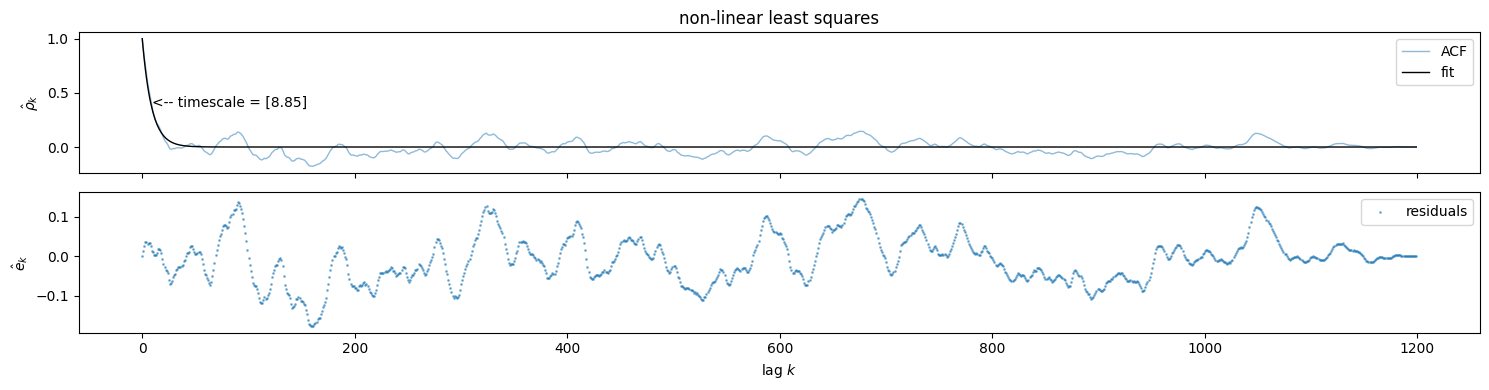

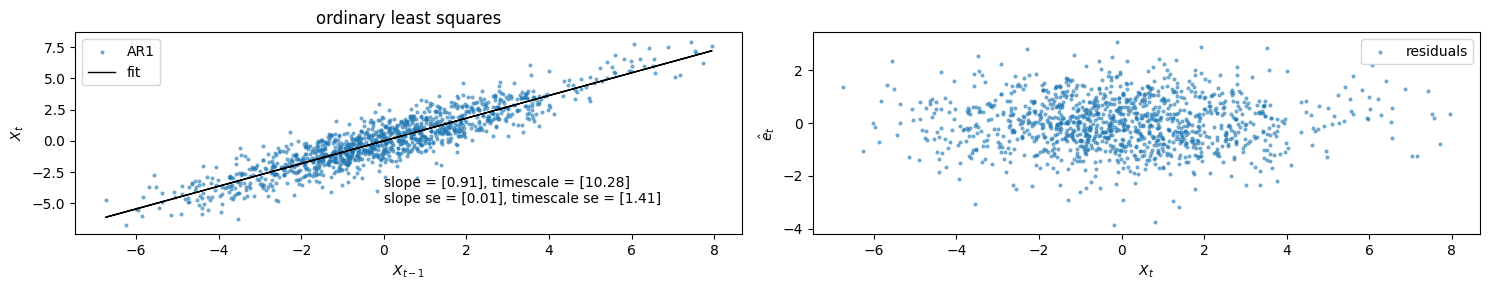

In [2]:
X = sim.sim_ar([0.9], n_timepoints).squeeze()  # AR(1)

nls_df = timescale_utils.estimate_timescales_nls(X.reshape(1, -1), n_regions)
ols_df = timescale_utils.estimate_timescales_ols(X.reshape(1, -1), n_regions)
std.plot_nls_vs_ols(X, n_timepoints, nls_df, ols_df)

**simulation of AR(1) and AR(2) processes**

In [3]:
# !! 20sec runtime !!

n_timepoints, n_repeats = 4800, 1000

# AR(1)
ar1_phis = np.array([0.9, 0.7, 0.5, 0.3, 0.1])
ar1_taus = -1 / np.log(ar1_phis)
ar1_df = std.mc_simulation(ar1_phis, n_timepoints, random_seed=10)

# AR(2)
ar2_phis = np.stack([ar1_phis, (0.5 - 0.5 * ar1_phis)], axis=-1)
ar21_phis = ar2_phis[:, 0] / (1 - ar2_phis[:, 1])
ar21_taus = -1 / np.log(ar21_phis)
ar2_df = std.mc_simulation(ar2_phis, n_timepoints)

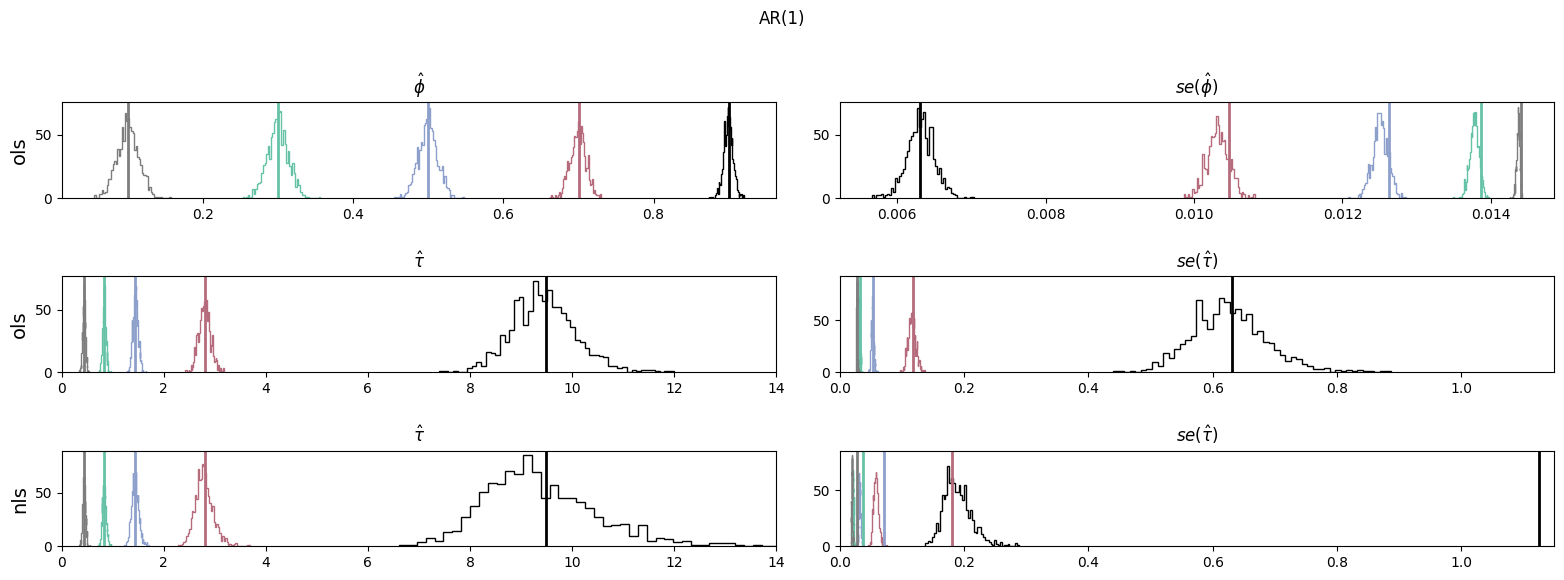

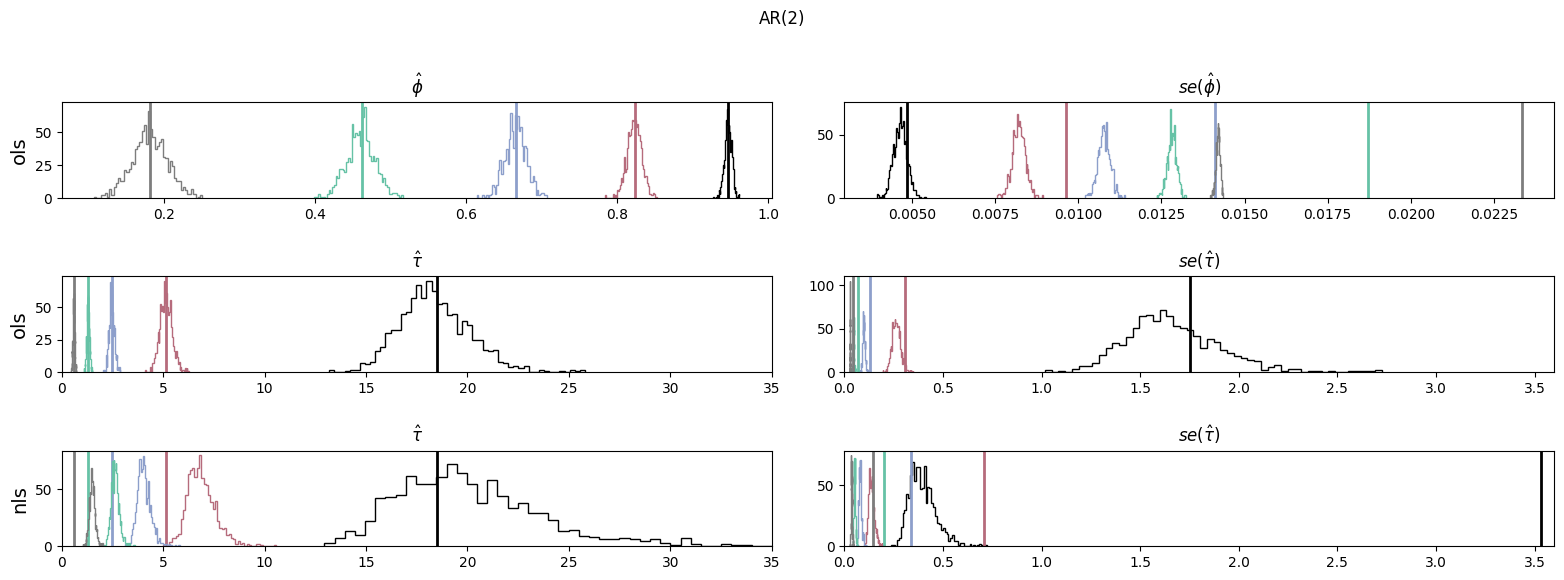

In [4]:
std.plot_simulation(ar1_df, ar1_phis, ar1_taus, [0, 14], [0, 1.15], "AR(1)")
std.plot_simulation(ar2_df, ar21_phis, ar21_taus, [0, 35], [0, 3.6], "AR(2)")